# Project Final Report

#### by Mia Chen, Anson Chung Yeung Lam, Sabhayata Rayamajhi, Sam Ju

In [49]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
players <- read_csv("https://raw.githubusercontent.com/miachen123-school/dsci_100_project/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


## 1. Introduction


### • Background

Video game companies often use newsletters to engage players with updates, promotions, and community events. Understanding which player characteristics predict newsletter subscriptions can help optimize marketing strategies. This project analyzes a dataset from a Minecraft research server managed by a computer science group at UBC to identify predictive features of subscription behavior. We will do this using K-Nearest Neighbors classification, which will predict the class of a data point based on the classes of the nearest neighbors.

### • Research Question

Can a player's total hours played (played_hours), age (Age), gender (gender), and experience level (experience) predict their likelihood of subscribing to the newsletter (subscribe)?

### • Dataset Description

The dataset players.csv contains information about individual players.

In [50]:
players <- read_csv("https://raw.githubusercontent.com/miachen123-school/dsci_100_project/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


From the table above "A spec_tbl_df: 196 × 7":

7 columns/variables: "experience, subscribe, hashedEmail, played_hours, name, gender, Age"
196 rows represent 196 people's data

1. Not all data is needed.
2. Focus on: played_hours, Age, gender, experience, and subscribe.

In [51]:
player_selected <- players |>
      select(played_hours, Age, gender, experience, subscribe)

head(player_selected, 5)

played_hours,Age,gender,experience,subscribe
<dbl>,<dbl>,<chr>,<chr>,<lgl>
30.3,9,Male,Pro,TRUE
3.8,17,Male,Veteran,TRUE
0.0,17,Male,Veteran,FALSE
0.7,21,Female,Amateur,TRUE
0.1,21,Male,Regular,TRUE


In [52]:
summary(player_selected, na.rm = TRUE)

  played_hours          Age           gender           experience       
 Min.   :  0.000   Min.   : 8.00   Length:196         Length:196        
 1st Qu.:  0.000   1st Qu.:17.00   Class :character   Class :character  
 Median :  0.100   Median :19.00   Mode  :character   Mode  :character  
 Mean   :  5.846   Mean   :20.52                                        
 3rd Qu.:  0.600   3rd Qu.:22.00                                        
 Max.   :223.100   Max.   :50.00                                        
                   NA's   :2                                            
 subscribe      
 Mode :logical  
 FALSE:52       
 TRUE :144      
                
                
                
                

## 2. Method & Results

#### • Figure 1: Distribution of Played Hours

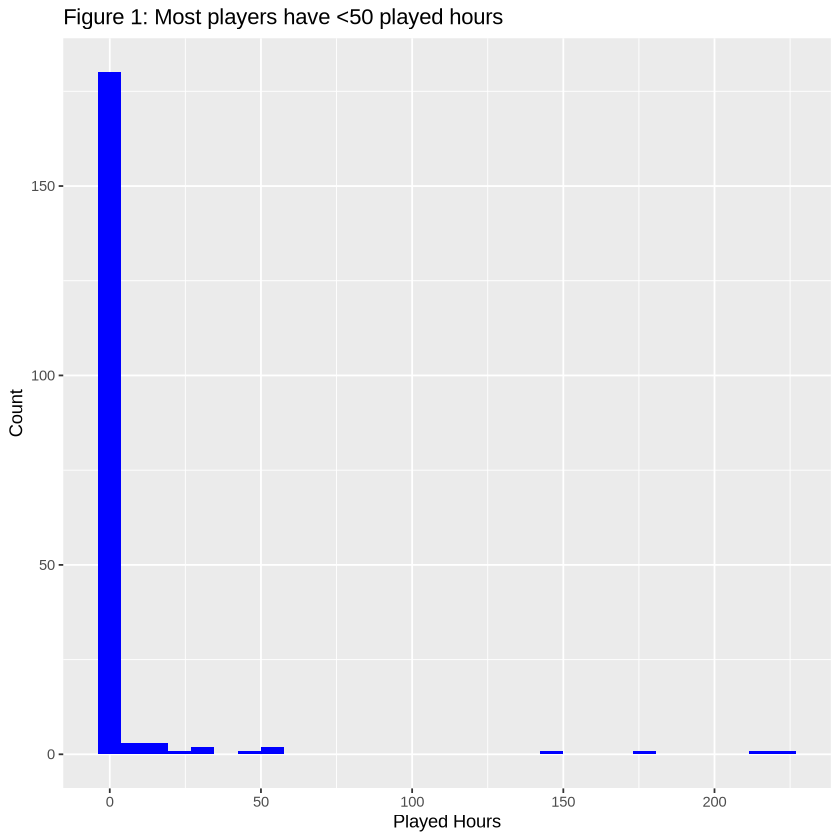

In [53]:
ggplot(players, aes(x = played_hours)) +
  geom_histogram(bins = 30, fill = "blue") +
  labs(title = "Figure 1: Most players have <50 played hours",
       x = "Played Hours", y = "Count")


Histogram of played_hours above:

1. Most players have <50 played hours.
2. Highest frequency at 0 played hours (~180 players).

#### • Figure 2: Playtime vs. Subscription Status

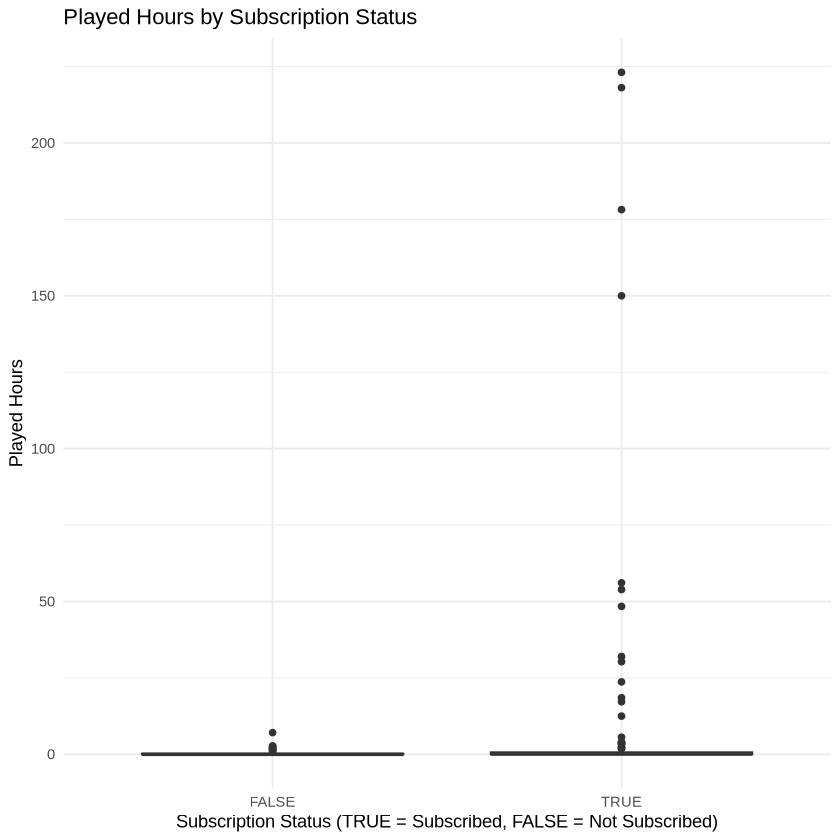

In [54]:
ggplot(players, aes(x = subscribe, y = played_hours)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Played Hours by Subscription Status",
       x = "Subscription Status (TRUE = Subscribed, FALSE = Not Subscribed)",
       y = "Played Hours") +
  theme_minimal()

Boxplot of played_hours by Subscription above:

1. Subscribers play significantly longer than non-subscribers.

#### • Figure 3: Subscription by Experience Level

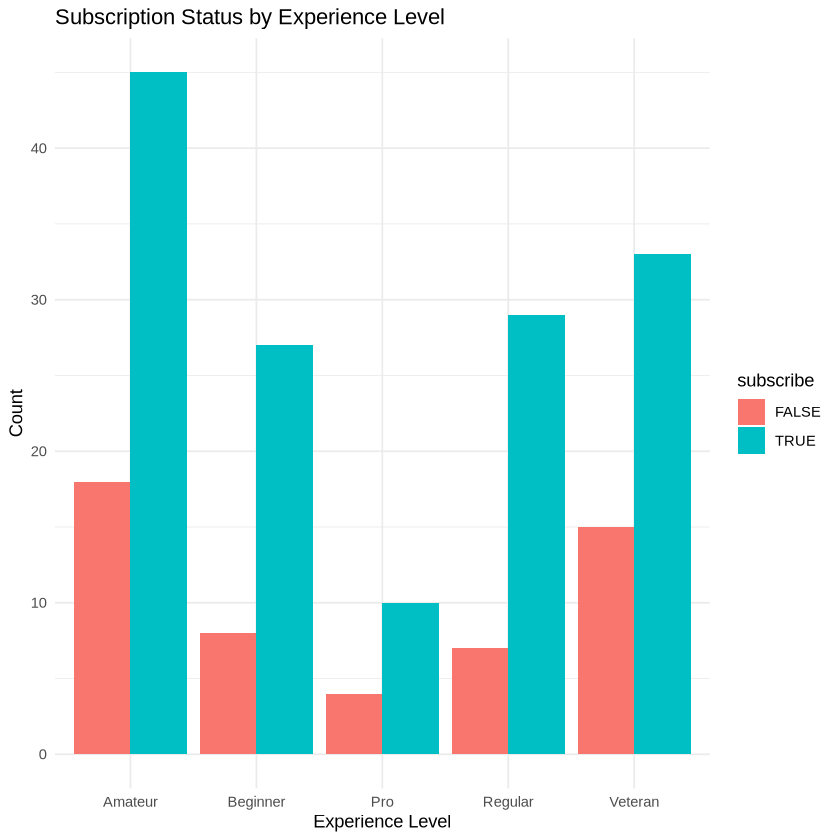

In [55]:
ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Status by Experience Level",
       x = "Experience Level",
       y = "Count") +
  theme_minimal()

Bar Plot: Subscription by Experience Level above:

1. The amateur level has the highest count for both subscribed and unsubscribed.
2. More players subscribe at all experience levels.

#### • Figure 4: Age Distribution by Subscription

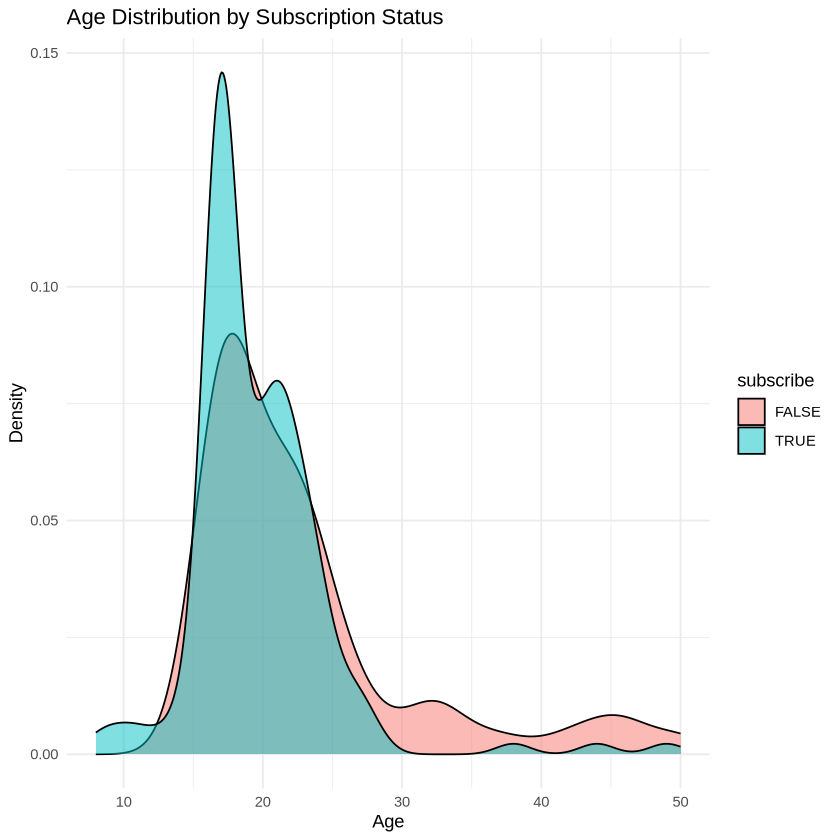

In [56]:
players_clean <- players |>
  filter(!is.na(Age) & is.finite(Age))

ggplot(players_clean, aes(x = Age, fill = subscribe)) +
  geom_density(alpha = 0.5) +
  labs(title = "Age Distribution by Subscription Status",
       x = "Age",
       y = "Density") +
  theme_minimal()

Density Plot: Age by Subscription above:

1. Most players aged 10-30 peak at 15-20.
2. More subscribers are in the 15-20 range; more unsubscribers are in the 23-50 range.

#### • Figure 5: Gender Differences

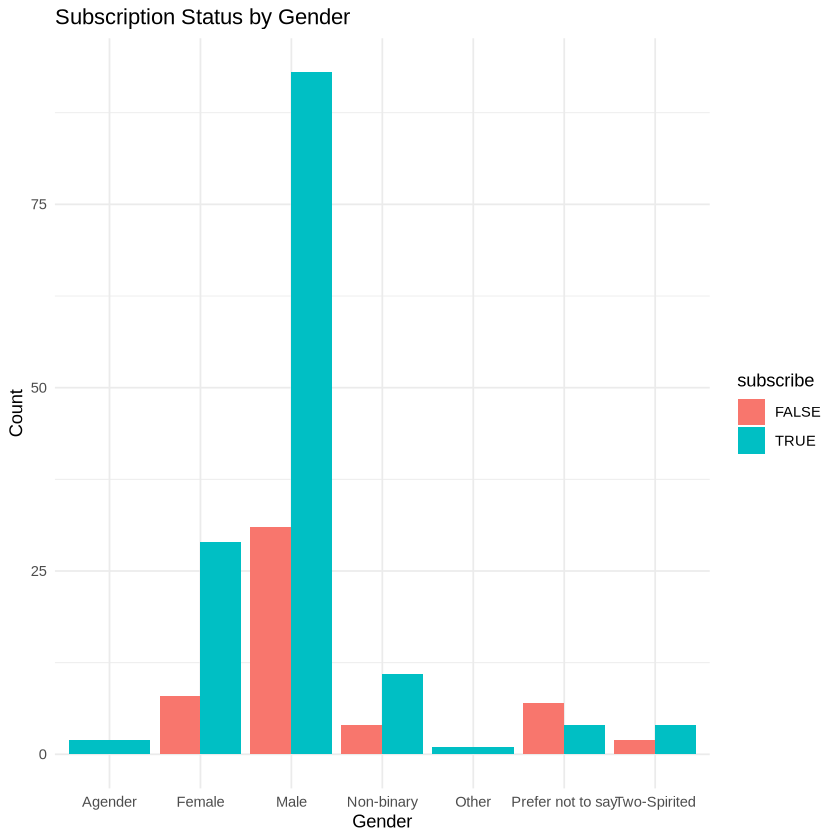

In [57]:
ggplot(players, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Status by Gender",
       x = "Gender",
       y = "Count") +
  theme_minimal()

Bar Plot: Subscription by Gender above:

1. Male players are the majority.
2. More subscribers than non-subscribers across genders.

Next Step: Compare subscription rates between female and male players.

gender,subscription_rate
<chr>,<dbl>
Female,78.37838
Male,75.00000


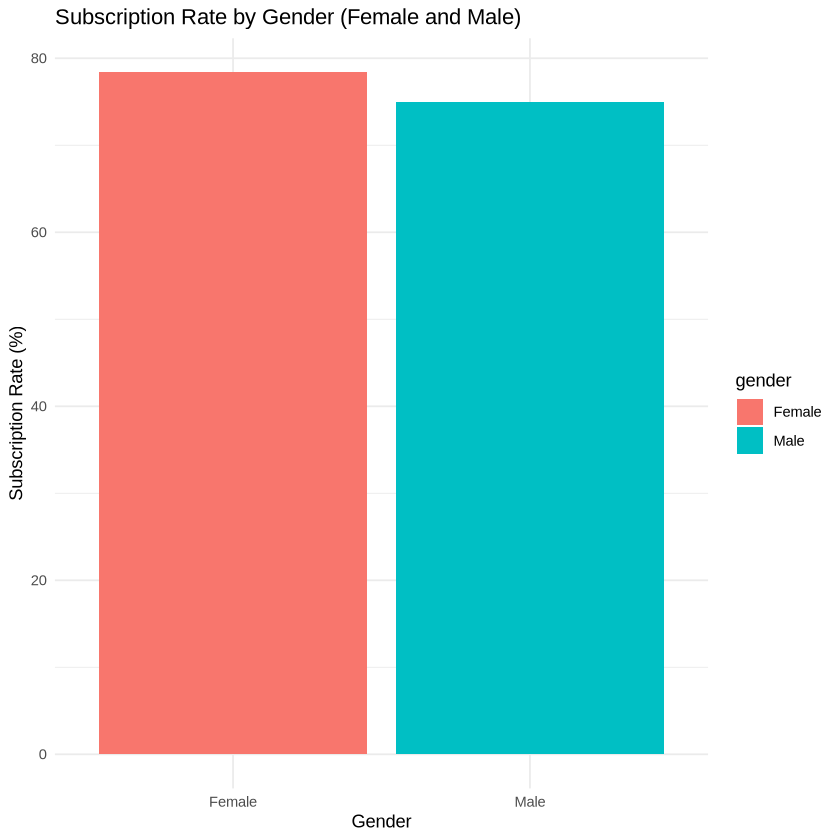

In [58]:
players_female_male <- players |>
  filter(gender %in% c("Female", "Male"))

subscription_rate <- players_female_male |>
  group_by(gender) |>
  summarise(subscription_rate = mean(subscribe == TRUE) * 100)
subscription_rate

ggplot(subscription_rate, aes(x = gender, y = subscription_rate, fill = gender)) +
  geom_bar(stat = "identity") +
  labs(title = "Subscription Rate by Gender (Female and Male)",
       x = "Gender",
       y = "Subscription Rate (%)") +
  theme_minimal()

#### • Data analysis: KNN classification

For this project, I will apply k-Nearest Neighbors (k-NN) Classification to predict if a player will subscribe to the newsletter (subscribe) based on their characteristics, which are total hours played (played_hours), age (Age), gender (gender), and experience level (experience). I picked this dataset because it contains all the information that I require to address my research questions. The k-NN approach is suitable since it is a straightforward, easy-to-interpret algorithm that performs well on classification problems with well-defined feature relationships. 

In [59]:
player_selected <- player_selected |> 
mutate(subscribe = as.factor(subscribe)) |>
filter(!is.na(Age))
     

In [60]:
set.seed(6666)
data_split <- initial_split(player_selected, prop = 0.75, strata = subscribe)
train_data <- training(data_split)
test_data <- testing(data_split)

In [61]:
knn_recipe <- recipe(subscribe ~ ., data = train_data) |>
  step_novel(all_nominal_predictors()) |>
  step_dummy(all_nominal_predictors()) |>  
  step_zv(all_predictors()) |>
  step_normalize(all_numeric_predictors())

In [62]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

In [63]:
knn_workflow <- workflow() |> 
add_model(knn_spec) |>
add_recipe(knn_recipe)
     

In [64]:
knn_grid <- grid_regular(neighbors(range = c(1, 5)), levels = 5)
knn_grid
     

neighbors
<int>
1
2
3
4
5


In [65]:
set.seed(6666)
cv_folds <- vfold_cv(train_data, v = 5, strata = subscribe)
     

In [66]:
knn_results <- tune_grid(
  knn_workflow,
  resamples = cv_folds,
  grid = knn_grid,
  metrics = metric_set(yardstick::accuracy)
)

results_df <- knn_results |>
collect_metrics()
print(results_df)
     

# A tibble: 5 × 7
  neighbors .metric  .estimator  mean     n std_err .config             
      <int> <chr>    <chr>      <dbl> <int>   <dbl> <chr>               
1         1 accuracy binary     0.640     5  0.0268 Preprocessor1_Model1
2         2 accuracy binary     0.633     5  0.0289 Preprocessor1_Model2
3         3 accuracy binary     0.648     5  0.0118 Preprocessor1_Model3
4         4 accuracy binary     0.655     5  0.0129 Preprocessor1_Model4
5         5 accuracy binary     0.724     5  0.0191 Preprocessor1_Model5


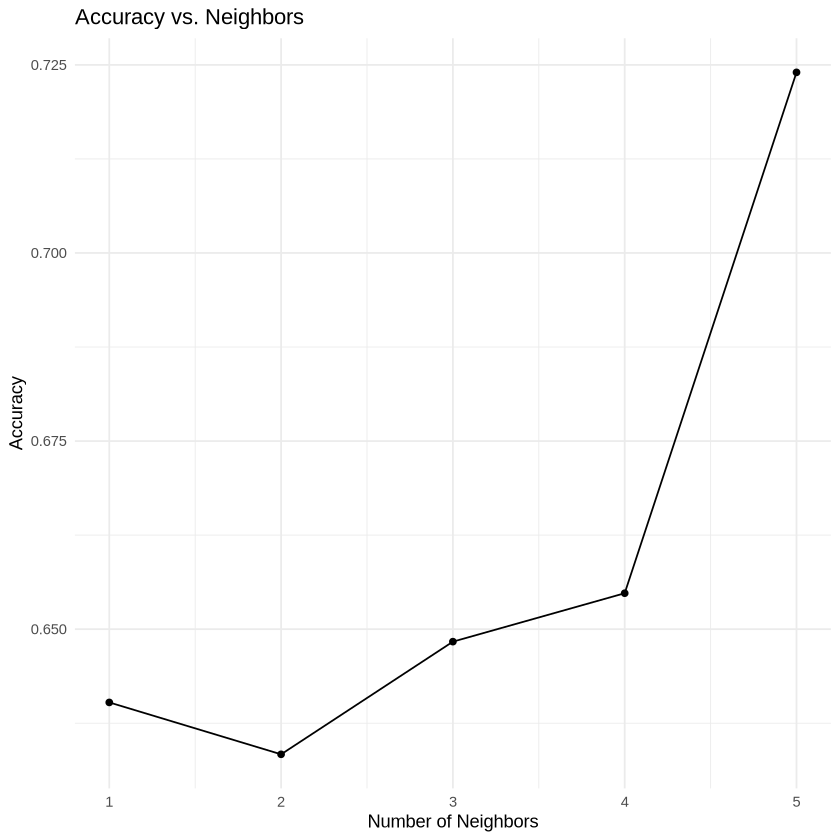

In [67]:
results_df |>
  filter(.metric == "accuracy") |>
ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    geom_point() +
    labs(
      title = "Accuracy vs. Neighbors",
      x = "Number of Neighbors",
      y = "Accuracy"
    ) +
    theme_minimal()
     

In [68]:
best_k <- select_best(knn_results, metric = "accuracy")
best_k
final_knn_workflow <- finalize_workflow(knn_workflow, best_k)
final_knn_fit <- fit(final_knn_workflow, data = train_data)
test_predictions <- predict(final_knn_fit, new_data = test_data) |>
  bind_cols(test_data)
test_predictions
     

neighbors,.config
<int>,<chr>
5,Preprocessor1_Model5


.pred_class,played_hours,Age,gender,experience,subscribe
<fct>,<dbl>,<dbl>,<chr>,<chr>,<fct>
TRUE,0,17,Male,Veteran,FALSE
TRUE,0,21,Male,Amateur,FALSE
TRUE,0,17,Male,Pro,TRUE
⋮,⋮,⋮,⋮,⋮,⋮
TRUE,0.0,17,Male,Amateur,TRUE
FALSE,0.0,17,Prefer not to say,Amateur,FALSE
TRUE,2.3,17,Male,Amateur,FALSE


In [69]:
subscribe_prediction_accuracy <- test_predictions |> 
  metrics(truth = subscribe, estimate = .pred_class)
subscribe_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7959184
kap,binary,0.3484043


## 3. Discussion

#### • Summary of Findings

#### • Expected vs. Unexpected Results

Some of our results were as expected, and some were not. We had thought that variables like total hours played and experience level, which reflect how frequently a person plays the game, would influence whether or not they would enroll in the newsletter. That was true for a significant variable, for example, the "experience level." Some other variables we had assumed would be significant, like gender, had little influence. This implies that subscription decisions are based more on the extent to which players engage with the game than on their demographic data.

#### • Impacts

These findings can be useful for marketing teams or game developers looking to grow their newsletter audience. Understanding that player experience and playtime are stronger indicators of subscription interest could allow companies to target promotions or subscription prompts more effectively, such as triggering them after certain milestones or hours of gameplay. Furthermore, these insights could guide future research on player engagement and communication strategies, helping tailor content that resonates more deeply with their most invested users.

#### • Future Question

1. Do subscription trends vary by game genre or platform?

2. Could in-game rewards (e.g., exclusive content) boost subscription rates?

3. How does subscription behavior evolve over time?